# PROJET IA : ETHIC FASHION - De la fast fashion à la mode éthique

## ANALYSE EXPLORATOIRE DE LA BASE DE DONNE

In [ ]:
# Importation des lirairies utiles
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Importations des dataframes avec pandas
df1 = pd.read_csv('/content/fastFashionCompDim.csv',sep="|")
df2 = pd.read_csv('/content/fastFasionItemsDim.csv',sep="|")
# Nommer les colonnes du DataFrame
#df.columns = ["item_code", "part_name", "material", "percent"]

In [ ]:
# affichage du dataframe
df1

,item_code,part_name,material,percent
0,200000,EXTERIOR,algodon,100%
1,200001,EXTERIOR,algodon,100%
2,200002,EXTERIOR,viscosa,62%
3,200002,EXTERIOR,fibra metalizada,37%
4,200002,EXTERIOR,elastano,1%
...,...,...,...,...
452,500036,EXTERIOR,algodon,97%
453,500036,EXTERIOR,elastano,3%
454,500037,EXTERIOR,poliester,67%
455,500037,EXTERIOR,viscosa,29%


In [ ]:
# affichage du dataframe
df2

,item_code,item_name,item_desc,join_life,joinlife_title,joinlife_desc,item_price
0,200000,CAMISA POPELÍN,"""Camisa de cuello solapa y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% algodon organico.,"""Algodon cultivado utilizando fertilizantes y ...",1995
1,200001,CAMISA POPELÍN,"""Camisa de cuello solapa y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% algodon organico.,"""Algodon cultivado utilizando fertilizantes y ...",1995
2,200002,BLUSA HILO METALIZADO,"""Blusa semitransparente de cuello solapa y esc...",False,NaN,NaN,3995
3,200003,BLUSA SATINADA ALAMARES,"""Blusa de cuello subido y escote pico. Manga l...",False,NaN,NaN,2995
4,200004,BLUSA ESTAMPADA CROPPED,"""Blusa satinada de cuello solapa y manga larga...",False,NaN,NaN,1995
...,...,...,...,...,...,...,...
271,500033,PANTALÓN PITILLO,"""Pantalon de tiro medio. Cintura con elastico ...",True,JOIN LIFE Care for fiber: al menos 25% poliest...,"""Esta fibra se obtiene a partir del reciclaje ...",1299
272,500034,PANTALÓN CINTURÓN RAFIA,"""Pantalon de tiro alto con cintura elastica. B...",False,NaN,NaN,1599
273,500035,PANTALÓN ESTAMPADO,"""Pantalon de tiro alto. Cintura elastica ajust...",False,NaN,NaN,1599
274,500036,PANTALÓN GARDEN,"""The Garden Pant In Grey.<br/><br/>Pantalon de...",False,NaN,NaN,1599


## Présentation des jeux de données

Nous avons deux jeux de données qui correspondent à 277 articles du catalogue espagnol Zara  récupérés sur leur site Web le 2020-11-07.

Le 1er dataframe correspond au Dimension des éléments (sur la ligne par élément) :
* **item_code"** : clé primaire. Code numérique attribué à chaque article en tissu.
* **item_name"** : chaîne de caractères, nom de l'article.
* **item_desc"** : chaîne de caractères, description de l'article.
* **join_life** : bool, si l'article est éco-étiqueté ou non.
* **joinlife_title** : str, marquage écologique.
* **joinlife_desc** : str, description de l'action écologique entreprise.
* **item_price** : num, prix de l'article en centimes d'euros.

Le 2ème dataframe correspond à la Composition Dimension (une rangée par vêtement):
* **item_code** : int, clé étrangère à fusionner avec la dimension des articles.
* **part_name** : str, partie de l'article vestimentaire (par exemple, intérieur/extérieur).
* **material** : chaîne de caractères, nom de la matière.
* **percent** : srt, pourcentage de la matière relative à l'article vestimentaire.

In [ ]:
unique_materials = df1['material'].unique()
print(unique_materials)

['algodon' 'viscosa' 'fibra metalizada' 'elastano' 'poliester' 'lino'
 'liocel' 'poliamida' 'nailon' 'lana' 'acrilico' 'camello' 'cupro' 'modal']


Le texte dans le jeu de données est en espagnol, et pour le comprendre voici la traduction des valeurs de la variable 'material':
* **algodon** : coton
* **viscosa** : viscose
* **fibra metalizada** : fibre métallisée
* **elastano** :élasthanne
* **poliester** : polyester
* **lino** : lin
* **liocel** : Lyocell
* **poliamida** : polyamide
* **nailon** : Nylon
* **lana** : laine
* **acrilico** : acrylique
* **camello** : chameau
* **cupro** : cupro
* **modal** : modal

In [ ]:
df = pd.merge(df1, df2, how="inner", on= "item_code")
df.set_index('item_code', inplace=True)
df

,part_name,material,percent,item_name,item_desc,join_life,joinlife_title,joinlife_desc,item_price
item_code,,,,,,,,,
200000,EXTERIOR,algodon,100%,CAMISA POPELÍN,"""Camisa de cuello solapa y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% algodon organico.,"""Algodon cultivado utilizando fertilizantes y ...",1995
200001,EXTERIOR,algodon,100%,CAMISA POPELÍN,"""Camisa de cuello solapa y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% algodon organico.,"""Algodon cultivado utilizando fertilizantes y ...",1995
200002,EXTERIOR,viscosa,62%,BLUSA HILO METALIZADO,"""Blusa semitransparente de cuello solapa y esc...",False,NaN,NaN,3995
200002,EXTERIOR,fibra metalizada,37%,BLUSA HILO METALIZADO,"""Blusa semitransparente de cuello solapa y esc...",False,NaN,NaN,3995
200002,EXTERIOR,elastano,1%,BLUSA HILO METALIZADO,"""Blusa semitransparente de cuello solapa y esc...",False,NaN,NaN,3995
...,...,...,...,...,...,...,...,...,...
500036,EXTERIOR,algodon,97%,PANTALÓN GARDEN,"""The Garden Pant In Grey.<br/><br/>Pantalon de...",False,NaN,NaN,1599
500036,EXTERIOR,elastano,3%,PANTALÓN GARDEN,"""The Garden Pant In Grey.<br/><br/>Pantalon de...",False,NaN,NaN,1599
500037,EXTERIOR,poliester,67%,PANTALÓN ANCHO PLIEGUES,"""Pantalon de tiro bajo. Bolsillos laterales y ...",False,NaN,NaN,1299


In [ ]:
dff = pd.merge(df1, df2, how="inner", on= "item_code")
dff.head(5)

,item_code,part_name,material,percent,item_name,item_desc,join_life,joinlife_title,joinlife_desc,item_price
0,200000,EXTERIOR,algodon,100%,CAMISA POPELÍN,"""Camisa de cuello solapa y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% algodon organico.,"""Algodon cultivado utilizando fertilizantes y ...",1995
1,200001,EXTERIOR,algodon,100%,CAMISA POPELÍN,"""Camisa de cuello solapa y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% algodon organico.,"""Algodon cultivado utilizando fertilizantes y ...",1995
2,200002,EXTERIOR,viscosa,62%,BLUSA HILO METALIZADO,"""Blusa semitransparente de cuello solapa y esc...",False,NaN,NaN,3995
3,200002,EXTERIOR,fibra metalizada,37%,BLUSA HILO METALIZADO,"""Blusa semitransparente de cuello solapa y esc...",False,NaN,NaN,3995
4,200002,EXTERIOR,elastano,1%,BLUSA HILO METALIZADO,"""Blusa semitransparente de cuello solapa y esc...",False,NaN,NaN,3995


## Résumé statistique des données

In [ ]:
print(df.dtypes)

part_name         object
material          object
percent           object
item_name         object
item_desc         object
join_life           bool
joinlife_title    object
joinlife_desc     object
item_price         int64
dtype: object


In [ ]:
# Convertion de la colonne "percent" en entier, et suppression du symbole % et convertir en entier
df["percent"] = df["percent"].astype(str).str.replace("%", "").astype(int)
print(df.dtypes)

part_name         object
material          object
percent            int64
item_name         object
item_desc         object
join_life           bool
joinlife_title    object
joinlife_desc     object
item_price         int64
dtype: object


In [ ]:
# Affichage des 3 premières lignes du DataFrame pour vérification
print(df.head(3))

          part_name material  percent              item_name  \
item_code                                                      
200000     EXTERIOR  algodon      100         CAMISA POPELÍN   
200001     EXTERIOR  algodon      100         CAMISA POPELÍN   
200002     EXTERIOR  viscosa       62  BLUSA HILO METALIZADO   

                                                   item_desc  join_life  \
item_code                                                                 
200000     "Camisa de cuello solapa y escote pico. Manga ...       True   
200001     "Camisa de cuello solapa y escote pico. Manga ...       True   
200002     "Blusa semitransparente de cuello solapa y esc...      False   

                                             joinlife_title  \
item_code                                                     
200000     JOIN LIFE Care for fiber: 100% algodon organico.   
200001     JOIN LIFE Care for fiber: 100% algodon organico.   
200002                                             

In [ ]:
# la dimension du dataframe
df.shape

(457, 9)

In [ ]:
df.isna().sum()

part_name           0
material            0
percent             0
item_name           0
item_desc           0
join_life           0
joinlife_title    294
joinlife_desc     294
item_price          0
dtype: int64

In [ ]:
# Suppression des variables "joinlife_title" et "joinlife_desc" car est contiennent beaucoup de NAN
df = df.drop(["joinlife_title", "joinlife_desc"], axis=1)
# la dimension du dataframe
df.shape

(457, 7)

#### Distribution des variables numériques

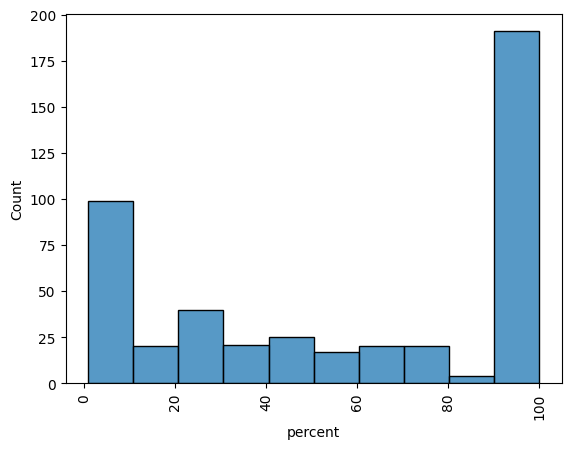

(457, 7)

In [ ]:
# Distribution des variables numériques

## Distriution de la variable percent
sns.histplot(df["percent"])
plt.xticks(rotation=90) # rotation des étiquettes de l'axe des x à un angle de 30 degrés
plt.show()# la dimension du dataframe
df.shape


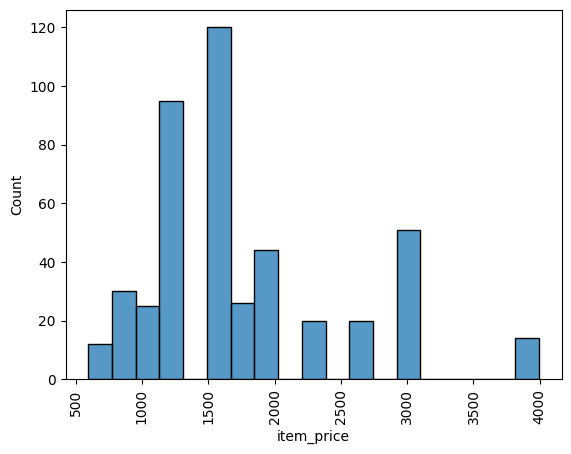

(457, 7)

In [ ]:
## Distriution de la variable item_price
sns.histplot(df["item_price"])
plt.xticks(rotation=90) # rotation des étiquettes de l'axe des x à un angle de 30 degrés
plt.show()# la dimension du dataframe
df.shape

### Distribution des variables qualificatives

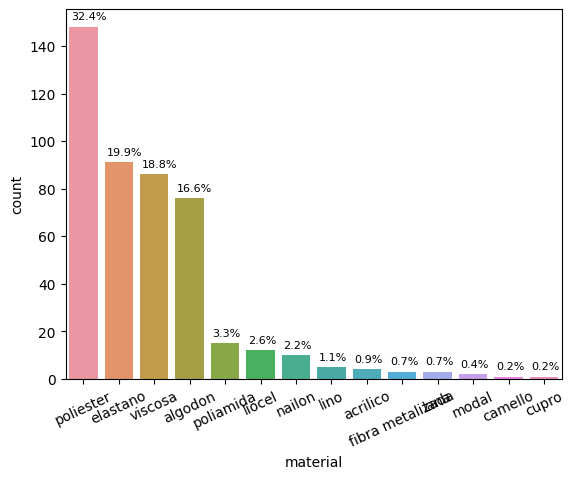

In [ ]:
# Relation entre variables catégoriques

#Distriution de la variable material 
# Créer un countplot pour la variable "material"
ax = sns.countplot(data=df, x="material", order=df["material"].value_counts().index)
plt.xticks(rotation=25)

# Ajout des pourcentages au-dessus des barres
total = len(df["material"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 3
    ax.annotate(percentage, (x - 0.25, y), size = 8)

# Affichage du plot
plt.show()


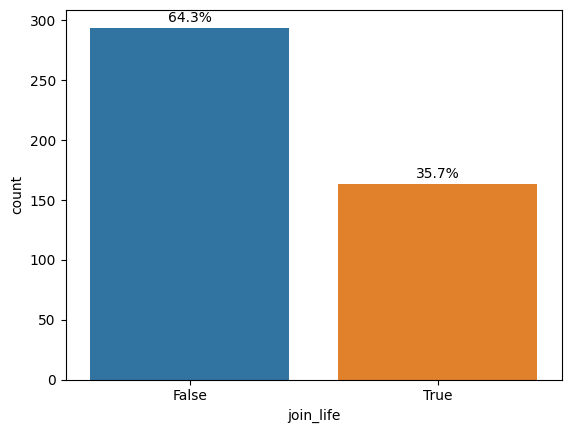

In [ ]:
# Création d'une figure et un axe pour le countplot
fig, ax = plt.subplots()

# Créer le countplot
sns.countplot(data=df, x="join_life", ax=ax)

# Obtenir le nombre total d'observations
n_obs = df["join_life"].count()

# Calculer et afficher les pourcentages
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / n_obs)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha="center")

# Afficher le plot
plt.show()


### Relation entre les variables 

#### La moyenne des prix des articles en fonction du type de matière

In [ ]:
# Grouper les données par matière et calculer la moyenne des prix pour chaque groupe
mean_price_by_material = df.groupby("material")["item_price"].mean()

# Création d'un dataframe à partir de la série de données
df_mean_price_by_material = pd.DataFrame(mean_price_by_material)

# Afficher le dataframe
print(df_mean_price_by_material)


                   item_price
material                     
acrilico          1847.000000
algodon           1505.210526
camello           1795.000000
cupro             3995.000000
elastano          1578.736264
fibra metalizada  2996.333333
lana              2595.000000
lino              1359.000000
liocel            1972.666667
modal             1795.000000
nailon            1457.800000
poliamida         1902.466667
poliester         1977.216216
viscosa           1792.720930


<ipython-input-30-8835107dceed>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_sorted, x="material", y="item_price", ci=None, order=df_sorted["material"])


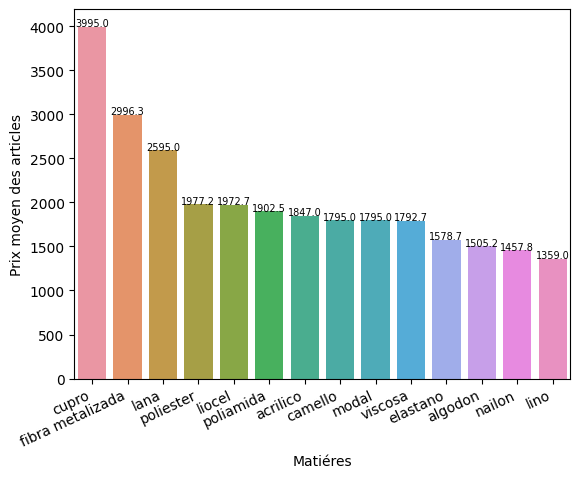

In [ ]:
# Trier le dataframe par prix moyen en ordre décroissant
df_sorted = df.groupby("material")["item_price"].mean().sort_values(ascending=False).reset_index()

# Création du barplot avec la moyenne des prix par matières
sns.barplot(data=df_sorted, x="material", y="item_price", ci=None, order=df_sorted["material"])
plt.xticks(rotation=25, ha="right")
ax = plt.gca()
ax.xaxis.set_tick_params(pad=3)

# Ajout des annotations pour afficher la valeur de chaque barre
for i, v in enumerate(df_sorted["item_price"]):
    plt.text(i, v + 5, "{:.1f}".format(v), ha="center",size = 7)

# Ajout des labels pour les axes
plt.xlabel("Matiéres")
plt.ylabel("Prix moyen des articles")


plt.savefig("mean_price.png", dpi=300)

# Afficher le plot
plt.show()


#### Relation entre le type de matière et leur pourcentage dans les

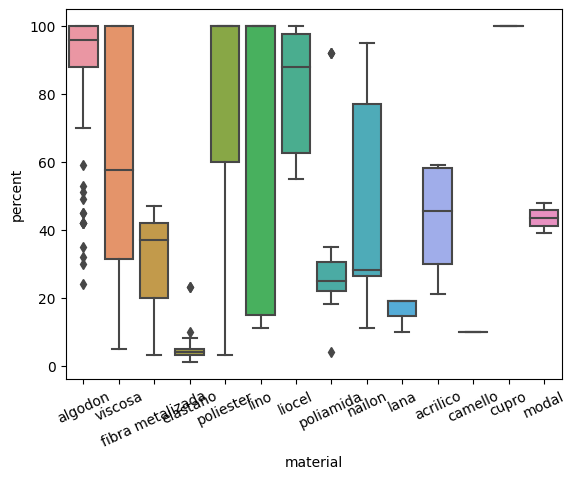

In [ ]:
# Afficher la relation entre les variables "material" et "percent"
sns.boxplot(data=df, x="material", y="percent")
plt.xticks(rotation=25)
plt.show()

#### Relation  entre le type de matière et le prix des articles 

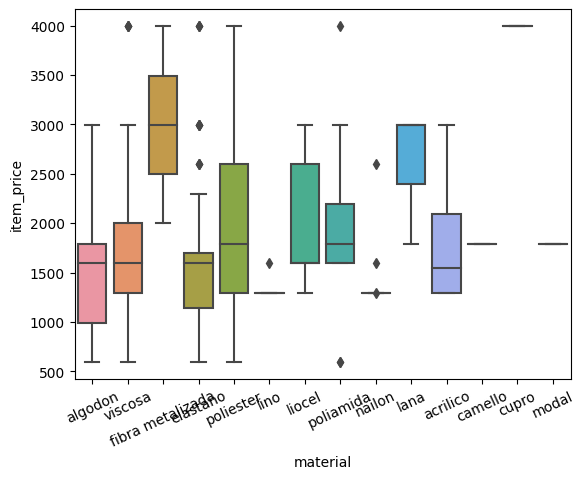

In [ ]:
# Afficher la relation entre les variables "material" et "item_price"
sns.boxplot(data=df, x="material", y="item_price")
plt.xticks(rotation=25)
plt.show()

#### Matrice de corrélation des variables item_price, join_life et percent

<ipython-input-26-fb5bc34ddff9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

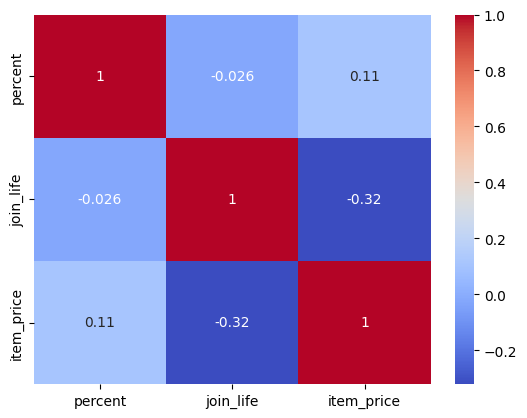

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
